In [2]:
pip install quandl

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import quandl 
from sklearn.linear_model import LinearRegression

In [4]:
quandl.ApiConfig.api_key = ''
stock_data = quandl.get('NSE/TCS', start_date='2018-12-01', end_date='2018-12-31')

print(stock_data)

               Open     High  ...  Total Trade Quantity  Turnover (Lacs)
Date                          ...                                       
2018-12-03  1984.00  1990.00  ...             1610576.0         31868.00
2018-12-04  1983.00  2019.40  ...             3270615.0         65568.23
2018-12-05  2006.00  2018.00  ...             2501539.0         50131.23
2018-12-06  1998.00  2017.00  ...             2321216.0         46373.71
2018-12-07  1985.05  2003.90  ...             1680420.0         33463.26
2018-12-10  1975.00  2011.00  ...             2010786.0         39990.73
2018-12-11  1970.00  2010.00  ...             2942014.0         58636.26
2018-12-12  2001.10  2022.00  ...             2219993.0         44663.42
2018-12-13  2024.00  2029.70  ...             3748429.0         74802.38
2018-12-14  1983.00  1998.95  ...             2473761.0         49094.42
2018-12-17  1999.00  2004.90  ...             1227921.0         24482.95
2018-12-18  1991.90  2002.00  ...             17687

In [5]:
dataset = pd.DataFrame(stock_data)

In [6]:
dataset.head()

dataset.to_csv('TCS.csv')

In [7]:
data = pd.read_csv('TCS.csv')

In [8]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2018-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2018-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2018-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [9]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

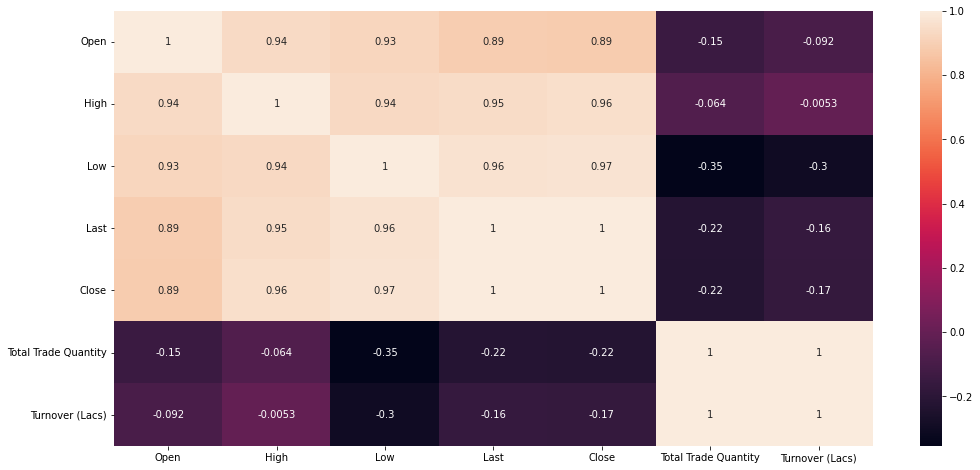

In [10]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [11]:
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [12]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [14]:
LR = LinearRegression()

In [15]:

LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
LR.score(x_test,y_test)

0.9997647484047153

In [17]:
Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
prediction = LR.predict(Test_data)

In [18]:

print(prediction)

[2001.75159573]
